# Metocean gridded spatial skill

Demonstrate plotting functionality etc by the SpatialSkill class

In [1]:
import pandas as pd
import modelskill as ms

In [2]:
fn = '../tests/testdata/NorthSeaHD_and_windspeed.dfsu'
mr = ms.model_result(fn, name='HD', item=0)
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)
o1 = ms.TrackObservation(df, item=2, name='alti')
cc = ms.match(o1, mr)

C:\Users\jem\Source\modelskill\modelskill\timeseries\_track.py:134: UserWarning: Removed 22 duplicate timestamps with keep=first
  warnings.warn(


In [3]:
ss = cc.gridded_skill()

In [4]:
ss

<xarray.Dataset>
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 50.6 51.66 52.7 53.75 54.8
  * x            (x) float64 -0.436 1.543 3.517 5.492 7.466
    observation  <U4 'alti'
Data variables:
    n            (y, x) int32 3 17 0 0 0 0 49 9 0 ... 70 33 15 27 37 79 0 20 75
    bias         (y, x) float64 -0.02626 -0.188 nan nan ... nan -0.2475 -0.1156
    rmse         (y, x) float64 0.03291 0.2105 nan nan ... nan 0.2635 0.1475
    urmse        (y, x) float64 0.01984 0.09468 nan nan ... nan 0.09066 0.09174
    mae          (y, x) float64 0.02626 0.1923 nan nan ... nan 0.2475 0.1217
    cc           (y, x) float64 0.9973 0.996 nan nan ... nan 0.6293 0.9842
    si           (y, x) float64 0.04669 0.08355 nan nan ... nan 0.0844 0.1475
    r2           (y, x) float64 -1.061 0.9003 nan nan ... nan -18.78 0.9078

In [5]:
ss.field_names

['n', 'bias', 'rmse', 'urmse', 'mae', 'cc', 'si', 'r2']

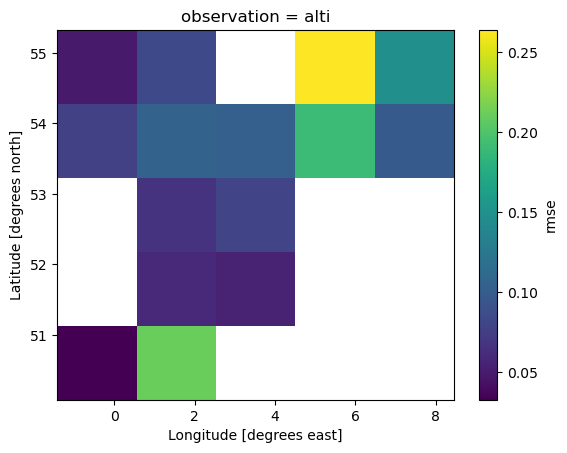

In [6]:
ss.rmse.plot();

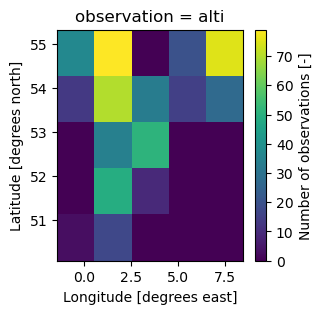

In [7]:
ss['n'].plot(figsize=(3,3));

## Multi models

In [8]:
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu"
mr1 = ms.model_result(fn, name="SW_1", item=0)
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu"
mr2 = ms.model_result(fn, name="SW_2", item=0)

In [9]:
o1 = ms.PointObservation("../tests/testdata/SW/HKNA_Hm0.dfs0", item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
cc = ms.match(obs=[o1, o2, o3], mod=[mr1, mr2])

## gridded_skill
Group by model

In [10]:
ss = cc.gridded_skill(by='model', bins=6)

In [11]:
ss.mod_names

['SW_1', 'SW_2']

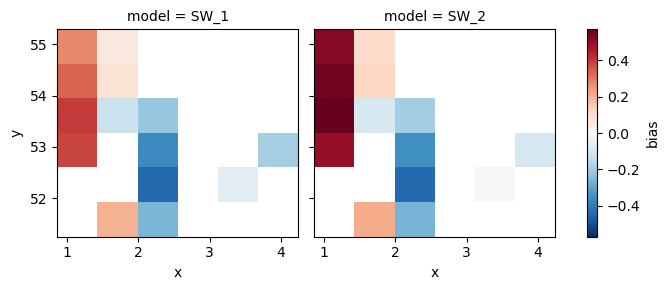

In [12]:
ss.bias.plot();

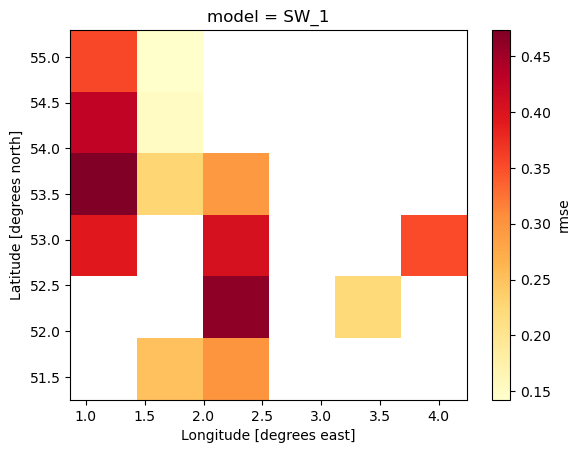

In [13]:
ss.rmse.plot(model='SW_1', cmap='YlOrRd');